In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"]=[13,8]

In [2]:
new_train=pd.read_csv("train_hr.csv")
new_test=pd.read_csv("test_hr.csv")

In [3]:
print("new_train:-",new_train.shape)
print("new_test:-",new_test.shape)

new_train:- (54808, 14)
new_test:- (23490, 13)


In [4]:
new_hr=pd.concat([new_train,new_test])
new_hr.shape

(78298, 14)

In [5]:
new_hr.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0


In [6]:
#Numerical Variable
num_var=['age','avg_training_score','length_of_service']
len(num_var)

3

In [7]:
new_hr.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [8]:
#Categorical Variable
cat_var=['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'previous_year_rating',
       'KPIs_met >80%', 'awards_won?', 'is_promoted']
len(cat_var)

10

In [9]:
new_hr["employee_id"].value_counts()

65438    1
30254    1
5278     1
19976    1
74405    1
        ..
74473    1
34077    1
71531    1
7803     1
5973     1
Name: employee_id, Length: 78298, dtype: int64

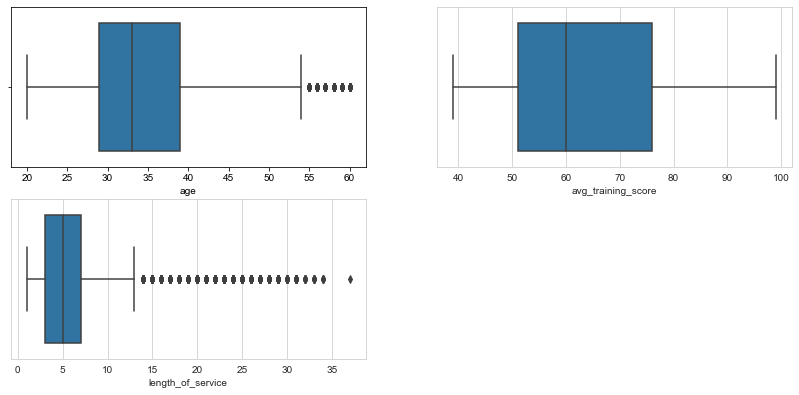

In [10]:
plt.rcParams["figure.figsize"]=[14,10]
c=1
for i in num_var:
    plt.subplot(3,2,c)
    sns.set_style('whitegrid')
    sns.boxplot(new_hr[i])
    c=c+1
plt.show()

In [11]:
#caiping outliers with uper limit and lower limit
for i in num_var:
    q1=new_hr[i].quantile(0.25)
    q3=new_hr[i].quantile(0.75)
    IQR=q3-q1
    ul=(q3+1.5*IQR)
    ll=(q1-1.5*IQR)
    new_hr.loc[(new_hr[i]>ul),i]=ul
    new_hr.loc[(new_hr[i]<ll),i]=ll

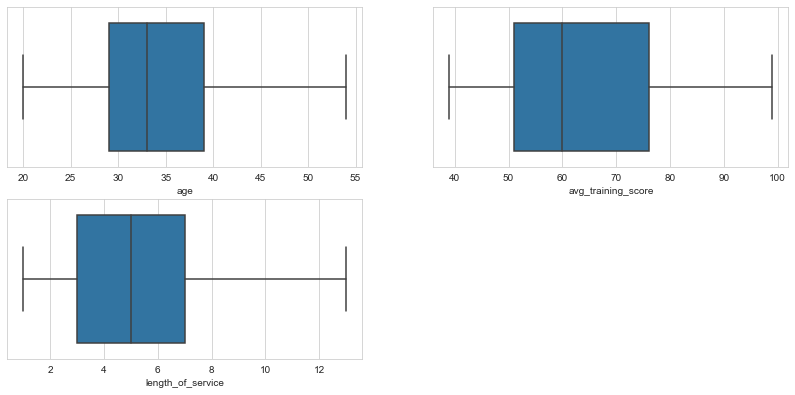

In [12]:
#check outliers
plt.rcParams["figure.figsize"]=[14,10]
c=1
for i in num_var:
    plt.subplot(3,2,c)
    sns.set_style('whitegrid')
    sns.boxplot(new_hr[i])
    c=c+1
plt.show()
#so here we can see outliers are not present in num data

# Binning
### Binning regions into three category according to the insieght we get in eda

In [13]:
#create a DataFrame with 2 features "region", "% of promotion"
region=(pd.DataFrame({"region":np.arange(1,35),"% of promotion":np.arange(1,35)}))
region.head()

,region,% of promotion
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5


In [14]:
x=0
for i in new_hr["region"].unique():
    region.iloc[x,0]=i
    region.iloc[x,1]=((len(new_hr.loc[(new_hr["region"]==i) & (new_hr["is_promoted"]==1.0)]))/len(new_hr.loc[new_hr["region"]==i]))*100
    x=x+1

In [15]:
region.sort_values(by="% of promotion",ascending=False,inplace=True)

In [16]:
region

,region,% of promotion
9,region_4,9.927361
17,region_17,9.420916
20,region_25,8.910035
3,region_23,8.101715
16,region_28,8.050183
1,region_22,8.006982
0,region_7,7.560440
31,region_3,7.505071
8,region_1,6.839623
23,region_30,6.344086


In [17]:
def reg(i):
    if i in ["region_4","region_17","region_25","region_23",
            "region_28","region_22","region_22","region_7","region_3",'region_1',
             'region_30','region_13','region_8','region_15']:
        return 3
    elif i in ['region_2','region_10','region_27','region_14','region_16',
               'region_12','region_26','region_20','region_19','region_31','region_11','region_6']:
        return 2
    elif i in ['region_5','region_29','region_21',
              'region_32', 'region_33','region_24','region_18','region_34','region_9'] :
        return 1
    else:
        return 1
    
new_hr["region"]=new_hr.region.apply(reg)

# Data Preprocessing

In [18]:
#drop emp id
new_hr.drop("employee_id",axis=1,inplace=True)

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [20]:
#numerical scaled
num_var=new_hr[['age', 'avg_training_score', 'length_of_service']]
scaled_num=sc.fit_transform(num_var)
scaled_num

array([[ 0.03890603, -1.07218442,  0.71643155],
       [-0.63480777, -0.25028165, -0.45706435],
       [-0.09583673, -0.99746599,  0.42305758],
       ...,
       [-1.17377881, -0.99746599, -0.45706435],
       [-1.03903605,  0.49690268, -1.33718627],
       [ 0.71261983,  1.91655291, -0.16369037]])

In [21]:
scaled_num=pd.DataFrame(scaled_num,columns=num_var.columns)
num_scaled=scaled_num.reset_index(drop=True)
num_scaled

,age,avg_training_score,length_of_service
0,0.038906,-1.072184,0.716432
1,-0.634808,-0.250282,-0.457064
2,-0.095837,-0.997466,0.423058
3,0.577877,-0.997466,1.303180
4,1.386334,0.721058,-1.043812
...,...,...,...
78293,-1.443264,-0.175563,-1.337186
78294,-0.500065,0.795776,0.423058
78295,-1.173779,-0.997466,-0.457064
78296,-1.039036,0.496903,-1.337186


In [22]:
#create get dummies of department variable
cat_var1=["department","education","gender","recruitment_channel"]
dep_get=pd.get_dummies(new_hr[cat_var1],drop_first=True)

In [23]:
get_dummies_d=dep_get.reset_index(drop=True)
get_dummies_d

,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,0,0,0,0,0,0,1,0,0,1,0,0,1
1,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78293,0,0,1,0,0,0,0,0,1,0,1,0,1
78294,0,0,0,0,0,0,0,1,0,0,1,0,1
78295,0,1,0,0,0,0,0,0,0,0,0,0,1
78296,0,0,0,0,1,0,0,0,0,0,1,0,1


In [24]:
cat_var

['department',
 'region',
 'education',
 'gender',
 'recruitment_channel',
 'no_of_trainings',
 'previous_year_rating',
 'KPIs_met >80%',
 'awards_won?',
 'is_promoted']

In [25]:
other=new_hr[['region','no_of_trainings', 'previous_year_rating',
       'KPIs_met >80%', 'awards_won?','is_promoted']]
other=other.reset_index(drop=True)
other

,region,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,is_promoted
0,3,1,5.0,1,0,0.0
1,3,1,5.0,0,0,0.0
2,2,1,3.0,0,0,0.0
3,3,2,1.0,0,0,0.0
4,2,1,3.0,0,0,0.0
...,...,...,...,...,...,...
78293,2,1,3.0,0,0,NaN
78294,3,1,3.0,0,0,NaN
78295,2,1,4.0,0,0,NaN
78296,2,3,NaN,0,0,NaN


In [26]:
#concat all scaled,get_dummies and other feature
scaled_hr=pd.concat([num_scaled,get_dummies_d,other],axis=1)

In [27]:
scaled_hr.head()

,age,avg_training_score,length_of_service,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,...,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,region,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,is_promoted
0,0.038906,-1.072184,0.716432,0,0,0,0,0,0,1,...,1,0,0,1,3,1,5.0,1,0,0.0
1,-0.634808,-0.250282,-0.457064,0,0,0,1,0,0,0,...,0,1,0,0,3,1,5.0,0,0,0.0
2,-0.095837,-0.997466,0.423058,0,0,0,0,0,0,1,...,0,1,0,1,2,1,3.0,0,0,0.0
3,0.577877,-0.997466,1.303180,0,0,0,0,0,0,1,...,0,1,0,0,3,2,1.0,0,0,0.0
4,1.386334,0.721058,-1.043812,0,0,0,0,0,0,0,...,0,1,0,0,2,1,3.0,0,0,0.0


In [28]:
scaled_hr.shape

(78298, 22)

# Missing Value imputation KNN

In [29]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
scaled_hr_imp = imputer.fit_transform(scaled_hr.drop("is_promoted",axis=1))

In [30]:
scaled_hr_imp

array([[ 0.03890603, -1.07218442,  0.71643155, ...,  5.        ,
         1.        ,  0.        ],
       [-0.63480777, -0.25028165, -0.45706435, ...,  5.        ,
         0.        ,  0.        ],
       [-0.09583673, -0.99746599,  0.42305758, ...,  3.        ,
         0.        ,  0.        ],
       ...,
       [-1.17377881, -0.99746599, -0.45706435, ...,  4.        ,
         0.        ,  0.        ],
       [-1.03903605,  0.49690268, -1.33718627, ...,  2.8       ,
         0.        ,  0.        ],
       [ 0.71261983,  1.91655291, -0.16369037, ...,  5.        ,
         1.        ,  0.        ]])

In [31]:
scaled_hr_imp=pd.DataFrame(scaled_hr_imp,columns=scaled_hr.drop("is_promoted",axis=1).columns)

In [32]:
scaled_hr_imp.isnull().sum()

age                             0
avg_training_score              0
length_of_service               0
department_Finance              0
department_HR                   0
department_Legal                0
department_Operations           0
department_Procurement          0
department_R&D                  0
department_Sales & Marketing    0
department_Technology           0
education_Below Secondary       0
education_Master's & above      0
gender_m                        0
recruitment_channel_referred    0
recruitment_channel_sourcing    0
region                          0
no_of_trainings                 0
previous_year_rating            0
KPIs_met >80%                   0
awards_won?                     0
dtype: int64

In [33]:
scaled_hr_imp

,age,avg_training_score,length_of_service,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,...,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,region,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?
0,0.038906,-1.072184,0.716432,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,3.0,1.0,5.0,1.0,0.0
1,-0.634808,-0.250282,-0.457064,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,3.0,1.0,5.0,0.0,0.0
2,-0.095837,-0.997466,0.423058,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,2.0,1.0,3.0,0.0,0.0
3,0.577877,-0.997466,1.303180,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,3.0,2.0,1.0,0.0,0.0
4,1.386334,0.721058,-1.043812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2.0,1.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78293,-1.443264,-0.175563,-1.337186,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,2.0,1.0,3.0,0.0,0.0
78294,-0.500065,0.795776,0.423058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,3.0,1.0,3.0,0.0,0.0
78295,-1.173779,-0.997466,-0.457064,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,1.0,4.0,0.0,0.0
78296,-1.039036,0.496903,-1.337186,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,2.0,3.0,2.8,0.0,0.0


In [34]:
pro=(scaled_hr["is_promoted"].reset_index(drop=True))

In [35]:
scaled_hr_imp=pd.concat([scaled_hr_imp,pro],axis=1)

In [36]:
scaled_hr_imp.shape

(78298, 22)

In [37]:
scaled_hr_imp

,age,avg_training_score,length_of_service,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,...,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,region,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,is_promoted
0,0.038906,-1.072184,0.716432,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,3.0,1.0,5.0,1.0,0.0,0.0
1,-0.634808,-0.250282,-0.457064,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,3.0,1.0,5.0,0.0,0.0,0.0
2,-0.095837,-0.997466,0.423058,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,2.0,1.0,3.0,0.0,0.0,0.0
3,0.577877,-0.997466,1.303180,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,3.0,2.0,1.0,0.0,0.0,0.0
4,1.386334,0.721058,-1.043812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,1.0,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78293,-1.443264,-0.175563,-1.337186,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,2.0,1.0,3.0,0.0,0.0,NaN
78294,-0.500065,0.795776,0.423058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,3.0,1.0,3.0,0.0,0.0,NaN
78295,-1.173779,-0.997466,-0.457064,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2.0,1.0,4.0,0.0,0.0,NaN
78296,-1.039036,0.496903,-1.337186,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,2.0,3.0,2.8,0.0,0.0,NaN


In [38]:
hr_train_cleaned = scaled_hr_imp.iloc[0:54808]
hr_test_cleaned = scaled_hr_imp.iloc[54808:]

In [39]:
hr_test_cleaned_x=hr_test_cleaned.drop("is_promoted",axis=1)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
xtrain,xtest,ytrain,ytest=train_test_split(hr_train_cleaned.drop("is_promoted",axis=1),hr_train_cleaned["is_promoted"],test_size=0.25)

log=LogisticRegression()
model=log.fit(xtrain,ytrain)
pred=model.predict(xtest)
print(f1_score(ytest,pred))

#model=log.fit(hr_train_cleaned.drop("is_promoted",axis=1),hr_train_cleaned["is_promoted"])
#pred=model.predict(hr_test_cleaned_x)

0.3602739726027397


In [41]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [42]:
xgb.fit(hr_train_cleaned.drop("is_promoted",axis=1),hr_train_cleaned["is_promoted"])

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [56]:
hr_train_cleaned.shape
new_train.shape

(54808, 14)

In [63]:
tr=scaled_hr_imp.iloc[:54808,:]
ts=scaled_hr_imp.iloc[54808:,:]

In [122]:
ytr=tr["is_promoted"]
xtr=tr.drop("is_promoted",axis=1)

In [65]:
from sklearn.metrics import f1_score
#xtrain,xtest,ytrain,ytest=train_test_split(hr_train_cleaned.drop("is_promoted",axis=1),hr_train_cleaned["is_promoted"],test_size=0.25)
xgb=XGBClassifier()
model=xgb.fit(tr.drop("is_promoted",axis=1),tr["is_promoted"])
pred=model.predict(ts.drop("is_promoted",axis=1))
#print(f1_score(ytest,pred))

In [66]:
len(pred)

23490

In [69]:
!pip install keras

     |████████████████████████████████| 1.7 MB 4.5 MB/s eta 0:00:01


In [72]:
!pip install tensorflow

     |████████████████████████████████| 241.2 MB 24 kB/s  eta 0:00:01   |▏                               | 1.5 MB 2.3 MB/s eta 0:01:45     |██                              | 15.4 MB 3.9 MB/s eta 0:00:59     |███████▊                        | 58.5 MB 4.1 MB/s eta 0:00:45     |██████████                      | 75.7 MB 1.5 MB/s eta 0:01:55     |████████████████████▍           | 153.7 MB 1.3 MB/s eta 0:01:06     |████████████████████████████▌   | 214.5 MB 2.6 MB/s eta 0:00:11
     |████████████████████████████████| 4.5 MB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 123 kB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 13.2 MB 3.9 MB/s eta 0:00:01    |█████████████████████▉          | 9.0 MB 2.8 MB/s eta 0:00:02     |██████████████████████████▍     | 10.9 MB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 9.9 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 3.4

In [75]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

2022-09-12 22:52:44.245018: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [123]:
from keras import utils as np_utils
import keras

In [190]:
model=keras.Sequential([keras.layers.Dense(units=1,input_shape=[21])])

In [191]:
model.compile(optimizer="sgd",loss="mean_squared_error")

In [192]:
model.fit(xtr,ytr,epochs=50)

Epoch 1/50
1713/1713 [==============================] - 3s 2ms/step - loss: 0.0939
Epoch 2/50
1713/1713 [==============================] - 3s 2ms/step - loss: 0.0692
Epoch 3/50
1713/1713 [==============================] - 3s 2ms/step - loss: 0.0669
Epoch 4/50
1713/1713 [==============================] - 3s 2ms/step - loss: 0.0656
Epoch 5/50
1713/1713 [==============================] - 3s 2ms/step - loss: 0.0646
Epoch 6/50
1713/1713 [==============================] - 3s 1ms/step - loss: 0.0639
Epoch 7/50
1713/1713 [==============================] - 3s 2ms/step - loss: 0.0631
Epoch 8/50
1713/1713 [==============================] - 3s 2ms/step - loss: 0.0627
Epoch 9/50
1713/1713 [==============================] - 3s 1ms/step - loss: 0.0623
Epoch 10/50
1713/1713 [==============================] - 3s 1ms/step - loss: 0.0619
Epoch 11/50
1713/1713 [==============================] - 3s 2ms/step - loss: 0.0616
Epoch 12/50
1713/1713 [==============================] - 3s 1ms/step - loss: 0.0614
E

In [193]:
pred=model.predict(ts.drop("is_promoted",axis=1))

735/735 [==============================] - 1s 1ms/step


In [194]:
pred=pred.flatten()
pred=[1 if i>0.29 else 0 for i in pred]
len(pred)

23490

In [187]:
new_test.shape

(23490, 13)

In [195]:
submission=pd.DataFrame({'employee_id':new_test.employee_id,
                        'is_promoted':pred})

submission.to_csv("newhr1.csv",index=False)

In [79]:
new_train.shape

(54808, 14)

In [88]:
xtrain.shape

(41106, 21)

In [89]:
ytrain.shape

(41106,)